# **_DESARROLLO EXÁMEN MÓDULO INTERMEDIO - Python for Data Science_**

In [1]:
#Instalando las librerías necesarias

import os   #Cambiar directorio de trabajo
import scipy
#Manipulación de Datos
import numpy as np
import pandas as pd

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocesado y modelado
from sklearn.model_selection import train_test_split #Para particionamiento en Datos de Entrenamiento y Prueba
from sklearn.linear_model import LogisticRegression  #Para Análisis de Regresión Logística 
from sklearn.metrics import r2_score                 #Calcula el coeficiente de determinación r2
from sklearn.metrics import mean_squared_error       #Calcula el error cuadratico medio
from sklearn.metrics import classification_report    #Para construir un reporte de clasificación
from sklearn.metrics import confusion_matrix         #Para construir la matriz de confusión
from sklearn.feature_selection import RFE            #Para medir la importancia de las variables incluidas
from sklearn.model_selection import cross_val_score  #Para llevar a cabo CrossValidation
from sklearn import metrics    
from sklearn.metrics import roc_curve,auc
from imblearn.under_sampling import RandomUnderSampler

#Para distintas métricas de evaluación
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import math as m

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score

#Just In Case
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Estableciendo directorio
os.chdir("D:\Social Data Consulting\Python for Data Science\data")

In [3]:
wines='wines_types.csv'
df_wines = pd.read_csv(wines)
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  wine_type             6497 non-null   object 
dtypes: float64(11), object(1)
memory usage: 609.2+ KB


In [4]:
df_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,white
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,red
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,white
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,white
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,white


In [5]:
columns=df_wines.columns.to_list()
target=['wine_type']
x=[x for x in columns if x not in target]

### **1. Codificar las variable wine_type (white= 1 y red=2) y particionar los datos en entrenamiento (75%) y prueba (25%)**

In [6]:
#Codificacion de la variable wine_type (white=1 y red=2)
df_wines.wine_type=np.where(df_wines.wine_type=="red",2,1)

#Particionamiento de la data, definimos X e y
X=df_wines.iloc[:,0:df_wines.shape[1]-1].values
y=df_wines.iloc[:,df_wines.shape[1]-1].values

# Generamos nuestra data de entrenamiento y testeo
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                              test_size=0.25,
                                              stratify=y,
                                              random_state=2020)

In [7]:
pd.value_counts(df_wines['wine_type'])

1    4898
2    1599
Name: wine_type, dtype: int64

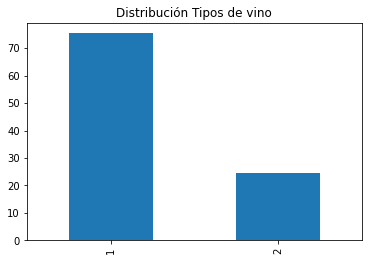

In [8]:
frecuencias=pd.value_counts(df_wines['wine_type'],sort=True)*100/len(df_wines)
frecuencias.plot(kind='bar')
plt.title('Distribución Tipos de vino')
plt.show()

### **_BALANCEO DE DATOS_**

In [11]:
rus=RandomUnderSampler(sampling_strategy=0.8,random_state=2020)
x_train_us,y_train_us=rus.fit_sample(X_train,y_train)

In [14]:
x_train_us_df=pd.DataFrame(x_train_us,columns=x)
y_train_us_df=pd.DataFrame(y_train_us,columns=target)

xtest_df=pd.DataFrame(X_test,columns=x)
ytest_df=pd.DataFrame(y_test,columns=target)

df_wines_train_us=pd.concat([x_train_us_df,y_train_us_df],axis=1)
df_wines_test=pd.concat([xtest_df,ytest_df],axis=1)

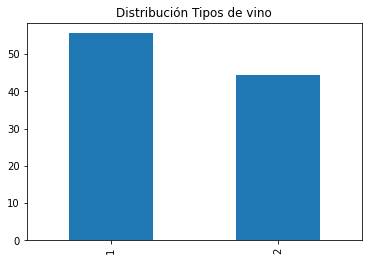

In [15]:
frecuencias=pd.value_counts(df_wines_train_us['wine_type'],sort=True)*100/len(df_wines_train_us)
frecuencias.plot(kind='bar')
plt.title('Distribución Tipos de vino')
plt.show()

### **2. Modelar el tipo de vino (wine_type) en función a las variables predictoras haciendo uso del modelo de regresión logístico. Considerar para las predicciones un punto de corte de 0.6**

In [16]:
logistic_model=LogisticRegression(max_iter=1000)
logistic_model.fit(x_train_us,y_train_us)

LogisticRegression(max_iter=1000)

##### Usando Cross Validation para evaluar la estabilidad de los datos

In [17]:
score=cross_val_score(estimator=logistic_model,
                     X=x_train_us,
                     y=y_train_us,
                     scoring="accuracy",
                     cv=10) #numero de particiones

In [18]:
print('La media de accuracy es: ', score.mean().round(2))

La media de accuracy es:  0.98


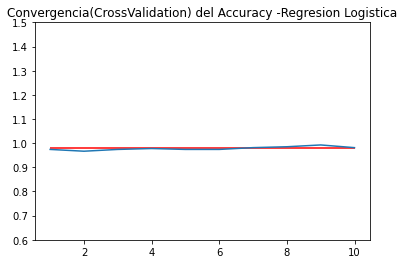

In [19]:
plt.plot(list(range(1,11)),score)
plt.ylim([0.6,1.5])
plt.hlines(score.mean(),xmin=1,xmax=10,color='red')
plt.title('Convergencia(CrossValidation) del Accuracy -Regresion Logistica')
plt.show()

In [20]:
prob_train=logistic_model.predict_proba(x_train_us)
prob_df_train_log=pd.DataFrame(prob_train[:,1],columns=['prob y=2'])

#### **Punto de Corte**

In [21]:
punto_corte=0.6
prob_df_train_log['prediccion']=np.where(prob_df_train_log['prob y=2']>punto_corte,2,1)
prob_df_train_log.head()

,prob y=2,prediccion
0,0.000194,1
1,0.002831,1
2,0.003950,1
3,0.075573,1
4,0.042408,1


### **3. Aplicar los parámetros del modelo de entrenamiento a los datos de testeo, considerar para las predicciones un punto de corte de 0.6**

In [22]:
prob_test=logistic_model.predict_proba(X_test)
prob_df_test_log=pd.DataFrame(prob_test[:,1],columns=['prob y=2'])

#### **Punto de Corte**

In [23]:
punto_corte=0.6
prob_df_test_log['prediccion']=np.where(prob_df_test_log['prob y=2']>punto_corte,2,1)
prob_df_test_log.head()

,prob y=2,prediccion
0,0.030373,1
1,0.534858,1
2,0.009609,1
3,0.002654,1
4,0.006526,1


### **4. Evaluar el modelo de regresión logístico haciendo uso de las métricas de accuracy, sensibilidad. especificidad, auc y curva ROC**

#### **_Metricas para data de entrenamiento_**

In [24]:
cm_train=pd.crosstab(y_train_us,prob_df_train_log['prediccion'])
cm_train

prediccion,1,2
row_0,,
1,1489,9
2,49,1150


In [25]:
VP_train=cm_train[2][2]
VN_train=cm_train[1][1]
FP_train=cm_train[2][1]
FN_train=cm_train[1][2]

In [26]:
accuracy_train_log=(VP_train+VN_train)/(VP_train+VN_train+FN_train+FP_train)
print('El Accuracy para la Data de Entrenamiento es:',accuracy_train_log.round(3))

El Accuracy para la Data de Entrenamiento es: 0.978


In [27]:
sensibilidad_train_log=(VP_train)/(VP_train+FN_train)
print('La Sensibilidad para la Data de Entrenamiento es:',sensibilidad_train_log.round(3))

La Sensibilidad para la Data de Entrenamiento es: 0.959


In [28]:
especificidad_train_log=(VN_train)/(VN_train+FP_train)
print('La Especificidad para la Data de Entrenamiento es:',especificidad_train_log.round(3))

La Especificidad para la Data de Entrenamiento es: 0.994


In [29]:
#Para calcular de la curva ROC y AUC, la función roc_curve exige que las categorias sean 0 y 1
y_train_us_cat=np.where(y_train_us==1,0,1)
prob_df_train_log['prediccion_cat']=np.where(prob_df_train_log['prediccion']==1,0,1)

fpr,tpr,thresholds=roc_curve(y_train_us_cat,prob_df_train_log['prediccion_cat'])
auc_train_log=auc(fpr,tpr)
print('El area Bajo la Curva(AUC) para Data de Entrenamiento es: ',auc_train_log.round(3))

El area Bajo la Curva(AUC) para Data de Entrenamiento es:  0.977


#### GRÁFICA CURVA ROC data entrenamiento

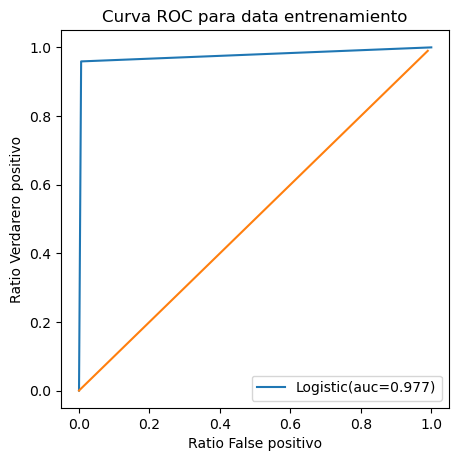

In [30]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label='Logistic(auc=%0.3f)'%auc_train_log)
plt.title('Curva ROC para data entrenamiento')
plt.xlabel('Ratio False positivo')
plt.ylabel('Ratio Verdarero positivo')
plt.legend()

x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.show()

#### **_Metricas para data de testeo_**

In [31]:
cm_test=pd.crosstab(y_test,prob_df_test_log['prediccion'])
cm_test

prediccion,1,2
row_0,,
1,1214,11
2,13,387


In [32]:
VP_test=cm_test[2][2]
VN_test=cm_test[1][1]
FP_test=cm_test[2][1]
FN_test=cm_test[1][2]

In [33]:
accuracy_test_log=(VP_test+VN_test)/(VP_test+VN_test+FN_test+FP_test)
print('El Accuracy para la Data de Entrenamiento es:',accuracy_test_log.round(3))

El Accuracy para la Data de Entrenamiento es: 0.985


In [34]:
sensibilidad_test_log=(VP_test)/(VP_test+FN_test)
print('La Sensibilidad para la Data de Entrenamiento es:',sensibilidad_test_log.round(3))

La Sensibilidad para la Data de Entrenamiento es: 0.968


In [35]:
especificidad_test_log=(VN_test)/(VN_test+FP_test)
print('La Especificidad para la Data de Entrenamiento es:',especificidad_test_log.round(3))

La Especificidad para la Data de Entrenamiento es: 0.991


In [36]:
#Para calcular de la curva ROC y AUC, la función roc_curve exige que las categorias sean 0 y 1
y_test_cat=np.where(y_test==1,0,1)
prob_df_test_log['prediccion_cat']=np.where(prob_df_test_log['prediccion']==1,0,1)

fpr,tpr,thresholds=roc_curve(y_test_cat,prob_df_test_log['prediccion_cat'])
auc_test_log=auc(fpr,tpr)
print('El area Bajo la Curva(AUC) para Data de Testeo es: ',auc_test_log.round(3))

El area Bajo la Curva(AUC) para Data de Testeo es:  0.979


#### GRÁFICA CURVA ROC data testeo

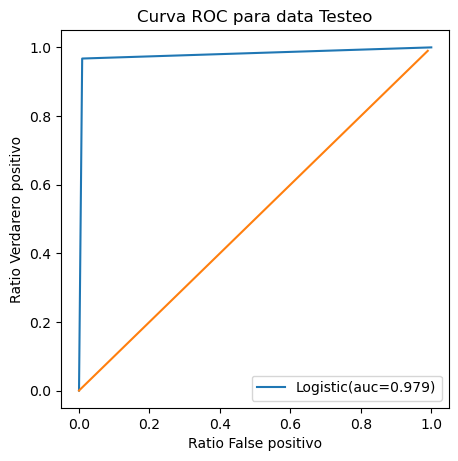

In [37]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label='Logistic(auc=%0.3f)'%auc_test_log)
plt.title('Curva ROC para data Testeo')
plt.xlabel('Ratio False positivo')
plt.ylabel('Ratio Verdarero positivo')
plt.legend()

x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.show()

### **5. Modelar el tipo de vino (wine_type) en función a las variables predictoras haciendo uso del modelo de análisis discriminante lineal. Considerar para las predicciones un punto de corte de 0.6.**

In [38]:
#Creamos el objeto de clase LinearDiscriminantAnalysis()
lda_model=LinearDiscriminantAnalysis()
#Ajustamos el modelo para aprender con la data balanceada
lda_model.fit(x_train_us,y_train_us)

LinearDiscriminantAnalysis()

##### Usando Cross Validation para evaluar la estabilidad de los datos

In [39]:
score=cross_val_score(estimator=lda_model,
                     X=x_train_us,
                     y=y_train_us,
                     scoring="accuracy",
                     cv=10) #numero de particiones

In [40]:
print('La media de accuracy es: ', score.mean().round(2))

La media de accuracy es:  0.99


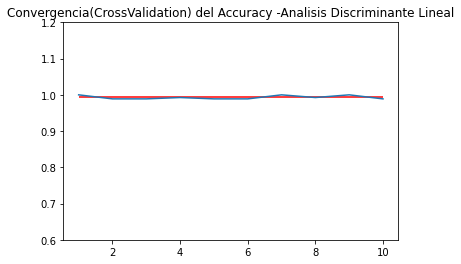

In [41]:
plt.plot(list(range(1,11)),score)
plt.ylim([0.6,1.2])
plt.hlines(score.mean(),xmin=1,xmax=10,color='red')
plt.title('Convergencia(CrossValidation) del Accuracy -Analisis Discriminante Lineal')
plt.show()

In [42]:
prob_train=lda_model.predict_proba(x_train_us)
prob_df_train_lda=pd.DataFrame(prob_train[:,1],columns=['prob y=2'])

#### **Punto de Corte 0.6**

In [43]:
punto_corte=0.6
prob_df_train_lda['prediccion']=np.where(prob_df_train_lda['prob y=2']>punto_corte,2,1)
prob_df_train_lda.head()

,prob y=2,prediccion
0,5.759352e-09,1
1,3.777151e-08,1
2,1.061875e-07,1
3,3.969924e-05,1
4,4.883100e-07,1


### **6. Aplicar los parámetros del modelo de entrenamiento a los datos de testeo, considerar para las predicciones un punto de corte de 0.6.**

In [44]:
prob_test=lda_model.predict_proba(X_test)
prob_df_test_lda=pd.DataFrame(prob_test[:,1],columns=['prob y=2'])

#### **Punto de Corte 0.6**

In [45]:
punto_corte=0.6
prob_df_test_lda['prediccion']=np.where(prob_df_test_lda['prob y=2']>punto_corte,2,1)
prob_df_test_lda.head()

,prob y=2,prediccion
0,1.020520e-06,1
1,9.174025e-06,1
2,3.164813e-09,1
3,4.063813e-08,1
4,4.755967e-09,1


### **7. Modelar el tipo de vino (wine_type) en función a las variables predictoras haciendo uso del modelo de análisis discriminante cuadrático. Considerar para las predicciones un punto de corte de 0.6.**

In [47]:
cda_model=QuadraticDiscriminantAnalysis()
cda_model.fit(x_train_us,y_train_us)

QuadraticDiscriminantAnalysis()

##### Usando Cross Validation para evaluar la estabilidad de los datos

In [48]:
score=cross_val_score(estimator=cda_model,
                     X=x_train_us,
                     y=y_train_us,
                     scoring="accuracy",
                     cv=10) #numero de particiones

In [50]:
print('La media de accuracy es: ', score.mean().round(3))

La media de accuracy es:  0.986


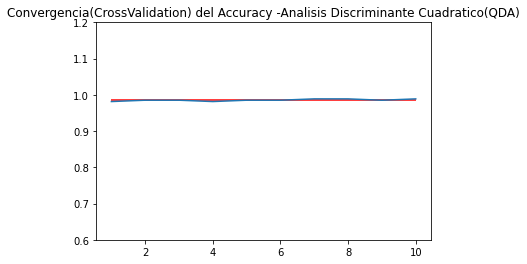

In [53]:
plt.plot(list(range(1,11)),score)
plt.ylim([0.6,1.2])
plt.hlines(score.mean(),xmin=1,xmax=10,color='red')
plt.title('Convergencia(CrossValidation) del Accuracy -Analisis Discriminante Cuadratico(QDA)')
plt.show()

In [54]:
prob_train=cda_model.predict_proba(x_train_us)
prob_df_train_cda=pd.DataFrame(prob_train[:,1],columns=['prob y=2'])

#### **Punto de Corte 0.6**

In [57]:
punto_corte=0.6
prob_df_train_cda['prediccion']=np.where(prob_df_train_cda['prob y=2']>punto_corte,2,1)
prob_df_train_cda.head()

,prob y=2,prediccion
0,4.612838e-31,1
1,2.084180e-09,1
2,4.206718e-24,1
3,1.341687e-04,1
4,7.487312e-05,1


### **8. Aplicar los parámetros del modelo de entrenamiento a los datos de testeo, considerar para las predicciones un punto de corte de 0.6.**

In [56]:
prob_test=cda_model.predict_proba(X_test)
prob_df_test_cda=pd.DataFrame(prob_test[:,1],columns=['prob y=2'])

#### **Punto de Corte 0.6**

In [58]:
punto_corte=0.6
prob_df_test_cda['prediccion']=np.where(prob_df_test_cda['prob y=2']>punto_corte,2,1)
prob_df_test_cda.head()

,prob y=2,prediccion
0,6.903395e-06,1
1,8.425247e-08,1
2,1.564088e-06,1
3,8.814704e-06,1
4,7.519831e-10,1


### **9. Evaluar los modelos de analisis discriminante lineal y cuadrático haciendo uso de las métricas de accuracy, sensibilidad. especificidad, auc y curva ROC**

### **_Modelo discriminante Lineal (LDA)_**

#### **_Métricas para Data de Entrenamiento_**

In [59]:
cm_train=pd.crosstab(y_train_us,prob_df_train_lda["prediccion"])
cm_train

prediccion,1,2
row_0,,
1,1492,6
2,13,1186


In [60]:
VP_train=cm_train[2][2]
VN_train=cm_train[1][1]
FP_train=cm_train[2][1]
FN_train=cm_train[1][2]

In [61]:
accuracy_train_lda=(VP_train+VN_train)/(VP_train+VN_train+FN_train+FP_train)
print('El Accuracy para la Data de Entrenamiento es:',accuracy_train_lda.round(3))

El Accuracy para la Data de Entrenamiento es: 0.993


In [62]:
sensibilidad_train_lda=(VP_train)/(VP_train+FN_train)
print('La Sensibilidad para la Data de Entrenamiento es:',sensibilidad_train_lda.round(3))

La Sensibilidad para la Data de Entrenamiento es: 0.989


In [63]:
especificidad_train_lda=(VN_train)/(VN_train+FP_train)
print('La Especificidad para la Data de Entrenamiento es:',especificidad_train_lda.round(3))

La Especificidad para la Data de Entrenamiento es: 0.996


In [64]:
#Para calcular de la curva ROC y AUC, la función roc_curve exige que las categorias sean 0 y 1
y_train_us_cat=np.where(y_train_us==1,0,1)
prob_df_train_lda['prediccion_cat']=np.where(prob_df_train_lda['prediccion']==1,0,1)

fpr,tpr,thresholds=roc_curve(y_train_us_cat,prob_df_train_lda['prediccion_cat'])
auc_train_lda=auc(fpr,tpr)
print('El area Bajo la Curva(AUC) para Data de Entrenamiento es: ',auc_train_lda.round(3))

El area Bajo la Curva(AUC) para Data de Entrenamiento es:  0.993


#### GRÁFICA CURVA ROC data entrenamiento

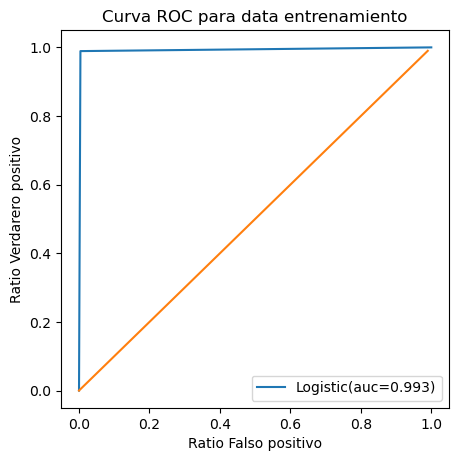

In [65]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label='Logistic(auc=%0.3f)'%auc_train_lda)
plt.title('Curva ROC para data entrenamiento')
plt.xlabel('Ratio Falso positivo')
plt.ylabel('Ratio Verdarero positivo')
plt.legend()

x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.show()

#### **_Métricas para Data de Testeo_**

In [66]:
cm_test=pd.crosstab(y_test,prob_df_test_lda["prediccion"])
cm_test

prediccion,1,2
row_0,,
1,1219,6
2,5,395


In [67]:
VP_test=cm_test[2][2]
VN_test=cm_test[1][1]
FP_test=cm_test[2][1]
FN_test=cm_test[1][2]

In [68]:
accuracy_test_lda=(VP_test+VN_test)/(VP_test+VN_test+FN_test+FP_test)
print('El Accuracy para la Data de Entrenamiento es:',accuracy_test_lda.round(3))

El Accuracy para la Data de Entrenamiento es: 0.993


In [69]:
sensibilidad_test_lda=(VP_test)/(VP_test+FN_test)
print('La Sensibilidad para la Data de Entrenamiento es:',sensibilidad_test_lda.round(3))

La Sensibilidad para la Data de Entrenamiento es: 0.988


In [70]:
especificidad_test_lda=(VN_test)/(VN_test+FP_test)
print('La Especificidad para la Data de Entrenamiento es:',especificidad_test_lda.round(3))

La Especificidad para la Data de Entrenamiento es: 0.995


In [71]:
#Para calcular de la curva ROC y AUC, la función roc_curve exige que las categorias sean 0 y 1
y_test_cat=np.where(y_test==1,0,1)
prob_df_test_lda['prediccion_cat']=np.where(prob_df_test_lda['prediccion']==1,0,1)

fpr,tpr,thresholds=roc_curve(y_test_cat,prob_df_test_lda['prediccion_cat'])
auc_test_lda=auc(fpr,tpr)
print('El area Bajo la Curva(AUC) para Data de Testeo es: ',auc_test_lda.round(3))

El area Bajo la Curva(AUC) para Data de Testeo es:  0.991


#### GRÁFICA CURVA ROC data testeo

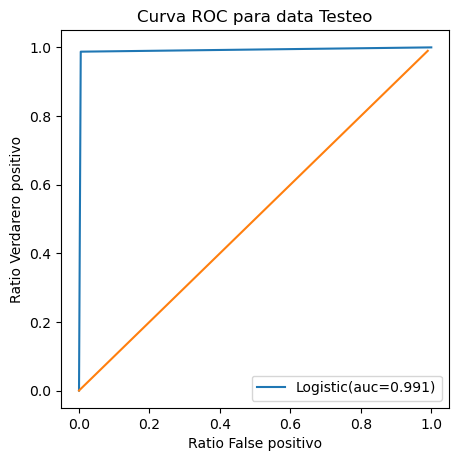

In [72]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label='Logistic(auc=%0.3f)'%auc_test_lda)
plt.title('Curva ROC para data Testeo')
plt.xlabel('Ratio False positivo')
plt.ylabel('Ratio Verdarero positivo')
plt.legend()

x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.show()

### **_Modelo discriminante Cuadrático (QDA)_**

#### **_Métricas para Data de Entrenamiento_**

In [73]:
cm_train=pd.crosstab(y_train_us,prob_df_train_cda["prediccion"])
cm_train

prediccion,1,2
row_0,,
1,1474,24
2,13,1186


In [74]:
VP_train=cm_train[2][2]
VN_train=cm_train[1][1]
FP_train=cm_train[2][1]
FN_train=cm_train[1][2]

In [75]:
accuracy_train_cda=(VP_train+VN_train)/(VP_train+VN_train+FN_train+FP_train)
print('El Accuracy para la Data de Entrenamiento es:',accuracy_train_cda.round(3))

El Accuracy para la Data de Entrenamiento es: 0.986


In [76]:
sensibilidad_train_cda=(VP_train)/(VP_train+FN_train)
print('La Sensibilidad para la Data de Entrenamiento es:',sensibilidad_train_cda.round(3))

La Sensibilidad para la Data de Entrenamiento es: 0.989


In [77]:
especificidad_train_cda=(VN_train)/(VN_train+FP_train)
print('La Especificidad para la Data de Entrenamiento es:',especificidad_train_cda.round(3))

La Especificidad para la Data de Entrenamiento es: 0.984


In [78]:
#Para calcular de la curva ROC y AUC, la función roc_curve exige que las categorias sean 0 y 1
y_train_us_cat=np.where(y_train_us==1,0,1)
prob_df_train_cda['prediccion_cat']=np.where(prob_df_train_cda['prediccion']==1,0,1)

fpr,tpr,thresholds=roc_curve(y_train_us_cat,prob_df_train_cda['prediccion_cat'])
auc_train_cda=auc(fpr,tpr)
print('El area Bajo la Curva(AUC) para Data de Entrenamiento es: ',auc_train_cda.round(3))

El area Bajo la Curva(AUC) para Data de Entrenamiento es:  0.987


#### GRÁFICA CURVA ROC data entrenamiento

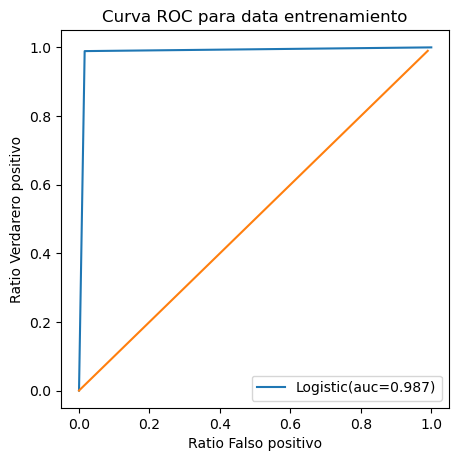

In [79]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label='Logistic(auc=%0.3f)'%auc_train_cda)
plt.title('Curva ROC para data entrenamiento')
plt.xlabel('Ratio Falso positivo')
plt.ylabel('Ratio Verdarero positivo')
plt.legend()

x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.show()

#### **_Métricas para Data de Testeo_**

In [80]:
cm_test=pd.crosstab(y_test,prob_df_test_cda["prediccion"])
cm_test

prediccion,1,2
row_0,,
1,1201,24
2,4,396


In [81]:
VP_test=cm_test[2][2]
VN_test=cm_test[1][1]
FP_test=cm_test[2][1]
FN_test=cm_test[1][2]

In [82]:
accuracy_test_cda=(VP_test+VN_test)/(VP_test+VN_test+FN_test+FP_test)
print('El Accuracy para la Data de Entrenamiento es:',accuracy_test_cda.round(3))

El Accuracy para la Data de Entrenamiento es: 0.983


In [83]:
sensibilidad_test_cda=(VP_test)/(VP_test+FN_test)
print('La Sensibilidad para la Data de Entrenamiento es:',sensibilidad_test_cda.round(3))

La Sensibilidad para la Data de Entrenamiento es: 0.99


In [84]:
especificidad_test_cda=(VN_test)/(VN_test+FP_test)
print('La Especificidad para la Data de Entrenamiento es:',especificidad_test_cda.round(3))

La Especificidad para la Data de Entrenamiento es: 0.98


In [85]:
#Para calcular de la curva ROC y AUC, la función roc_curve exige que las categorias sean 0 y 1
y_test_cat=np.where(y_test==1,0,1)
prob_df_test_cda['prediccion_cat']=np.where(prob_df_test_cda['prediccion']==1,0,1)

fpr,tpr,thresholds=roc_curve(y_test_cat,prob_df_test_cda['prediccion_cat'])
auc_test_cda=auc(fpr,tpr)
print('El area Bajo la Curva(AUC) para Data de Testeo es: ',auc_test_cda.round(3))

El area Bajo la Curva(AUC) para Data de Testeo es:  0.985


#### GRÁFICA CURVA ROC data testeo

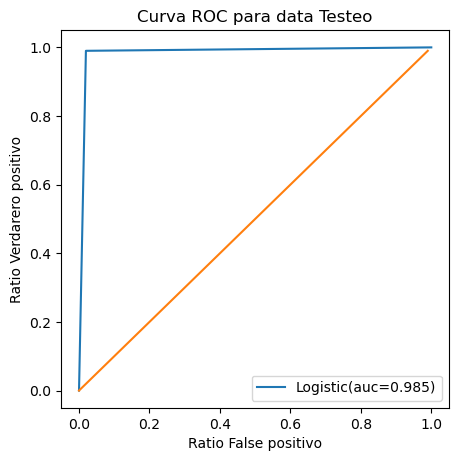

In [86]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label='Logistic(auc=%0.3f)'%auc_test_cda)
plt.title('Curva ROC para data Testeo')
plt.xlabel('Ratio False positivo')
plt.ylabel('Ratio Verdarero positivo')
plt.legend()

x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.show()

### **10. Realice una evaluación comentada de los tres modelos y seleccione uno de ellos (el de mejor performance) y estime la probabilidad de que el tipo de vino sea rojo teniendo en cuenta los siguientes valores para la variables:**

- fixed acidity(acidez fija): 7.2
- volatile acidity(acidez volátil): 0.35
- citric acid(ácido cítrico): 0.74
- residual sugar(azúcar residual): 2.2
- chlorides(cloruros): 0.051
- free sulfur dioxide(dióxido de azufre libre): 32.0
- total sulfur dioxide(dióxido de azufre total): 183
- density(densidad): 0.98720
- pH: 3.15
- sulphates(sulfatos): 0.38
- alcohol: 12.0

**_RESUMEN DE MODELOS PARA DATA ENTRENAMIENTO_**

In [87]:
accuracy=[accuracy_train_log,accuracy_train_lda,accuracy_train_cda]
sensibilidad=[sensibilidad_train_log,sensibilidad_train_lda,sensibilidad_train_cda]
especificidad=[especificidad_train_log,especificidad_train_lda,especificidad_train_cda]
auc=[auc_train_log,auc_train_lda,auc_train_cda]

resumen_train=pd.DataFrame([accuracy,sensibilidad,especificidad,auc],
                          columns=['Reg.Logistica','Discriminante Lineal','Discriminante Cuadrático'],
                          index=['Accuracy','Sensibilidad','Especificidad','AUC'])
resumen_train.head()

,Reg.Logistica,Discriminante Lineal,Discriminante Cuadrático
Accuracy,0.978495,0.992955,0.986281
Sensibilidad,0.959133,0.989158,0.989158
Especificidad,0.993992,0.995995,0.983979
AUC,0.976562,0.992576,0.986568


In [88]:
best_accuracy=resumen_train.columns[resumen_train.loc['Accuracy',].argmax()]
best_accuracy
best_sensibilidad=resumen_train.columns[resumen_train.loc['Sensibilidad',].argmax()]
best_sensibilidad
best_especificidad=resumen_train.columns[resumen_train.loc['Especificidad',].argmax()]
best_especificidad
best_AUC=resumen_train.columns[resumen_train.loc['AUC',].argmax()]
best_AUC

print("Modelo ganador por Accuracy     : ",best_accuracy)
print("Modelo ganador por Sensibilidad : ",best_sensibilidad)
print("Modelo ganador por Especificidad: ",best_especificidad)
print("Modelo ganador por AUC          : ",best_AUC)

Modelo ganador por Accuracy     :  Discriminante Lineal
Modelo ganador por Sensibilidad :  Discriminante Lineal
Modelo ganador por Especificidad:  Discriminante Lineal
Modelo ganador por AUC          :  Discriminante Lineal


**_RESUMEN DE MODELOS PARA DATA TESTEO_**

In [89]:
accuracy=[accuracy_test_log,accuracy_test_lda,accuracy_test_cda]
sensibilidad=[sensibilidad_test_log,sensibilidad_test_lda,sensibilidad_test_cda]
especificidad=[especificidad_test_log,especificidad_test_lda,especificidad_test_cda]
auc=[auc_test_log,auc_test_lda,auc_test_cda]

resumen_test=pd.DataFrame([accuracy,sensibilidad,especificidad,auc],
                          columns=['Reg.Logistica','Discriminante Lineal','Discriminante Cuadrático'],
                          index=['Accuracy','Sensibilidad','Especificidad','AUC'])
resumen_test.head()

,Reg.Logistica,Discriminante Lineal,Discriminante Cuadrático
Accuracy,0.985231,0.993231,0.982769
Sensibilidad,0.967500,0.987500,0.990000
Especificidad,0.991020,0.995102,0.980408
AUC,0.979260,0.991301,0.985204


In [90]:
best_accuracy=resumen_test.columns[resumen_test.loc['Accuracy',].argmax()]
best_accuracy
best_sensibilidad=resumen_test.columns[resumen_test.loc['Sensibilidad',].argmax()]
best_sensibilidad
best_especificidad=resumen_test.columns[resumen_test.loc['Especificidad',].argmax()]
best_especificidad
best_AUC=resumen_test.columns[resumen_test.loc['AUC',].argmax()]
best_AUC

print("Modelo ganador por Accuracy     : ",best_accuracy)
print("Modelo ganador por Sensibilidad : ",best_sensibilidad)
print("Modelo ganador por Especificidad: ",best_especificidad)
print("Modelo ganador por AUC          : ",best_AUC)

Modelo ganador por Accuracy     :  Discriminante Lineal
Modelo ganador por Sensibilidad :  Discriminante Cuadrático
Modelo ganador por Especificidad:  Discriminante Lineal
Modelo ganador por AUC          :  Discriminante Lineal


Se puede observar que tanto para la data de entrenamiento como para la data de testeo, el modelo que más performance ha tenido a nivel de voto mayoritario bajo las métricas evaluadas es el **Modelo de Analisis Discriminante Lineal**. Procedemos a usar el modelo Discriminante Lineal para evaluar la probabilidad de que el vino sea rojo en base a los valores predeterminados.

In [94]:
dato_evaluacion=np.array([[7.2,0.35,0.74,2.2,0.051,32.0,183,0.98720,3.15,0.38,12.0]])
best_pred=lda_model.predict_proba(dato_evaluacion)
print("La probabilidad de que el tipo de vino sea rojo es: ", best_pred[:,1])

La probabilidad de que el tipo de vino sea rojo es:  [4.33628747e-18]
